<a href="https://colab.research.google.com/github/kranov582/house_prices/blob/main/Previsao_precos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Definição do Problema

## 2 Preparação de Dados

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Para mostrar todas as linhas do pandas
pd.set_option('display.max_rows', None)

# Para mostrar todas as colunas do pandas
pd.set_option('display.max_columns', None)

### 1.1 Carga do Dataset

In [3]:
# Informa a URL de importação do dataset
url_test = "https://raw.githubusercontent.com/kranov582/house_prices/refs/heads/main/test.csv"
url_train = "https://raw.githubusercontent.com/kranov582/house_prices/refs/heads/main/train.csv"

# Lê o arquivo
train = pd.read_csv(url_train, delimiter=',')
test = pd.read_csv(url_test, delimiter=',')

datasets = [train, test]

# Mostra as primeiras linhas do dataset
train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 2.1 Pré processamento dos dados

In [5]:
# Mostra as informações do dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [8]:
print(test.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879

In [9]:
for dataset in datasets:
    try:
      dataset.drop(columns = ['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)
    except:
      pass
    dataset.fillna(dataset.mode().iloc[0], inplace=True)

In [10]:
for dataset in datasets:
  print(dataset.nunique())

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBa

In [11]:
# Identificar colunas categóricas no primeiro DataFrame (treino)
categorical_columns = train.select_dtypes(include=['object']).columns

# Configurar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar o encoder no primeiro DataFrame (treino)
encoder.fit(train[categorical_columns])

# Iterar pela lista de DataFrames e transformar cada um
transformed_dataframes = []
for df in datasets:
    # Transformar as colunas categóricas
    encoded_data = encoder.transform(df[categorical_columns])

    # Criar um DataFrame para os dados codificados
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenar colunas numéricas e categóricas transformadas
    transformed_df = pd.concat([df.drop(columns=categorical_columns).reset_index(drop=True),
                                 encoded_df.reset_index(drop=True)], axis=1)

    # Adicionar o DataFrame transformado à lista
    transformed_dataframes.append(transformed_df)

# A lista transformed_dataframes agora contém os DataFrames transformados
final_train, final_test = transformed_dataframes

In [12]:
# Garantir que "SalePrice" fique por último
columns = [col for col in final_train.columns if col != 'SalePrice']  # Todas as colunas, exceto "SalePrice"
columns.append('SalePrice')
final_train = final_train[columns]  # Reordenar o DataFrame

In [13]:
final_train.shape

(1460, 267)

### 2.3 Feature selection

In [14]:
# fig, ax = plt.subplots (figsize=(150, 150))
# sns.heatmap(final_train.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Define um limite para a correlação
correlation_threshold = 0.3

# Calcula a matriz de correlação
correlation_matrix = final_train.corr()

# Seleciona os atributos com alta correlação com a variável objetivo
target_correlation = correlation_matrix.iloc[:, -1]  # Correlação com a última coluna (y)
high_corr_features = target_correlation[abs(target_correlation) > correlation_threshold].index

# Remove a variável objetivo da lista de atributos
high_corr_features = high_corr_features.drop(final_train.columns[-1])

# Filtra o conjunto de dados com base nos atributos selecionados
X_high_corr = final_train[high_corr_features]
y = final_train.iloc[:, -1]

# Usa SelectKBest para refinar ainda mais os atributos com base na pontuação
best_var = SelectKBest(score_func=f_regression, k=min(50, len(high_corr_features)))

# Ajusta e transforma
fit = best_var.fit(X_high_corr, y)
features = fit.transform(X_high_corr)

# Resultados
print('\nNúmero original de atributos:', X_high_corr.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos selecionados e suas pontuações
np.set_printoptions(precision=3)  # 3 casas decimais
print("\nScores dos Atributos Selecionados:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=high_corr_features))


Número original de atributos: 42

Número reduzido de atributos: 42

Scores dos Atributos Selecionados: [ 177.237 2436.771  548.666  504.715  419.328  255.924  880.341  845.524
  165.561 1470.585  668.43   580.763  406.504  274.059 1013.706  926.951
  171.495  161.577  178.694  281.283  149.551  151.048  372.622  375.329
  774.677  194.742  480.157  642.637  482.24   152.04   166.32   339.503
  339.399  157.99   496.713  168.239  538.359  209.078  311.696  523.246
  213.66   206.281]

Atributos Selecionados: ['LotFrontage' 'OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'FullBath'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'Neighborhood_NoRidge' 'Neighborhood_NridgHt'
 'Exterior1st_VinylSd' 'Exterior2nd_VinylSd' 'ExterQual_Ex' 'ExterQual_Gd'
 'ExterQual_TA' 'Foundation_CBlock' 'Foundation_PConc' 'BsmtQual_Ex'
 'BsmtQual_TA' 'BsmtExposure_Gd' 'BsmtExposure_No' 'BsmtF

In [16]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
# Lista de colunas desejadas
selected_columns = list(best_var.get_feature_names_out(input_features=high_corr_features))

train_model = final_train[selected_columns + ['SalePrice']]
test_model = final_train[selected_columns]

train_model.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Neighborhood_NoRidge,Neighborhood_NridgHt,Exterior1st_VinylSd,Exterior2nd_VinylSd,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_Ex,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,250000


In [18]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 9 # semente aleatória

# Separação em conjuntos de treino e teste
array = train_model.values
X_FS = array[:,0:train_model.shape[1] - 1]
y_FS = array[:,train_model.shape[1] - 1]
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS,
    test_size=test_size, shuffle=True, random_state=seed) # holdout

print(X_FS)

# Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

[[6.500e+01 7.000e+00 2.003e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.000e+01 6.000e+00 1.976e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.800e+01 7.000e+00 2.001e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.600e+01 7.000e+00 1.941e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.800e+01 5.000e+00 1.950e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 [7.500e+01 5.000e+00 1.965e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


## 3 Modelagem e Treinamento

### 3.1 Criação e avaliação de modelos: dados padronizados e normalizados

In [19]:
# Criação da lista dos resultados
final_results = pd.DataFrame(columns = ['Modelo', 'RMSE'])

RL-orig: MSE 1319048405.51770 (992305306.25653) - RMSE 36318.70600
Ridge-orig: MSE 1318300061.48457 (997067069.99447) - RMSE 36308.40208
Lasso-orig: MSE 1317906278.97644 (993105493.07630) - RMSE 36302.97893
KNN-orig: MSE 1745896672.83872 (588433007.25875) - RMSE 41783.92840
CART-orig: MSE 2264567582.03570 (936909526.21549) - RMSE 47587.47295
SVM-orig: MSE 6500969158.97050 (1489259518.63993) - RMSE 80628.58773
Bag-orig: MSE 1692794418.61908 (519929142.79773) - RMSE 41143.58296
RF-orig: MSE 1011033646.96337 (420815952.91848) - RMSE 31796.75529
ET-orig: MSE 1046554673.77459 (421143971.96450) - RMSE 32350.49727
Ada-orig: MSE 1397254754.48893 (493560936.92463) - RMSE 37379.87098
GB-orig: MSE 992220609.44009 (517394984.44765) - RMSE 31499.53348
Vot-orig: MSE 1901927851.30742 (528410722.38248) - RMSE 43611.09780
RL-padr: MSE 1319048405.51769 (992305306.25649) - RMSE 36318.70600
Ridge-padr: MSE 1317779943.04081 (989270965.41576) - RMSE 36301.23886
Lasso-padr: MSE 1317838847.40303 (992710992.29

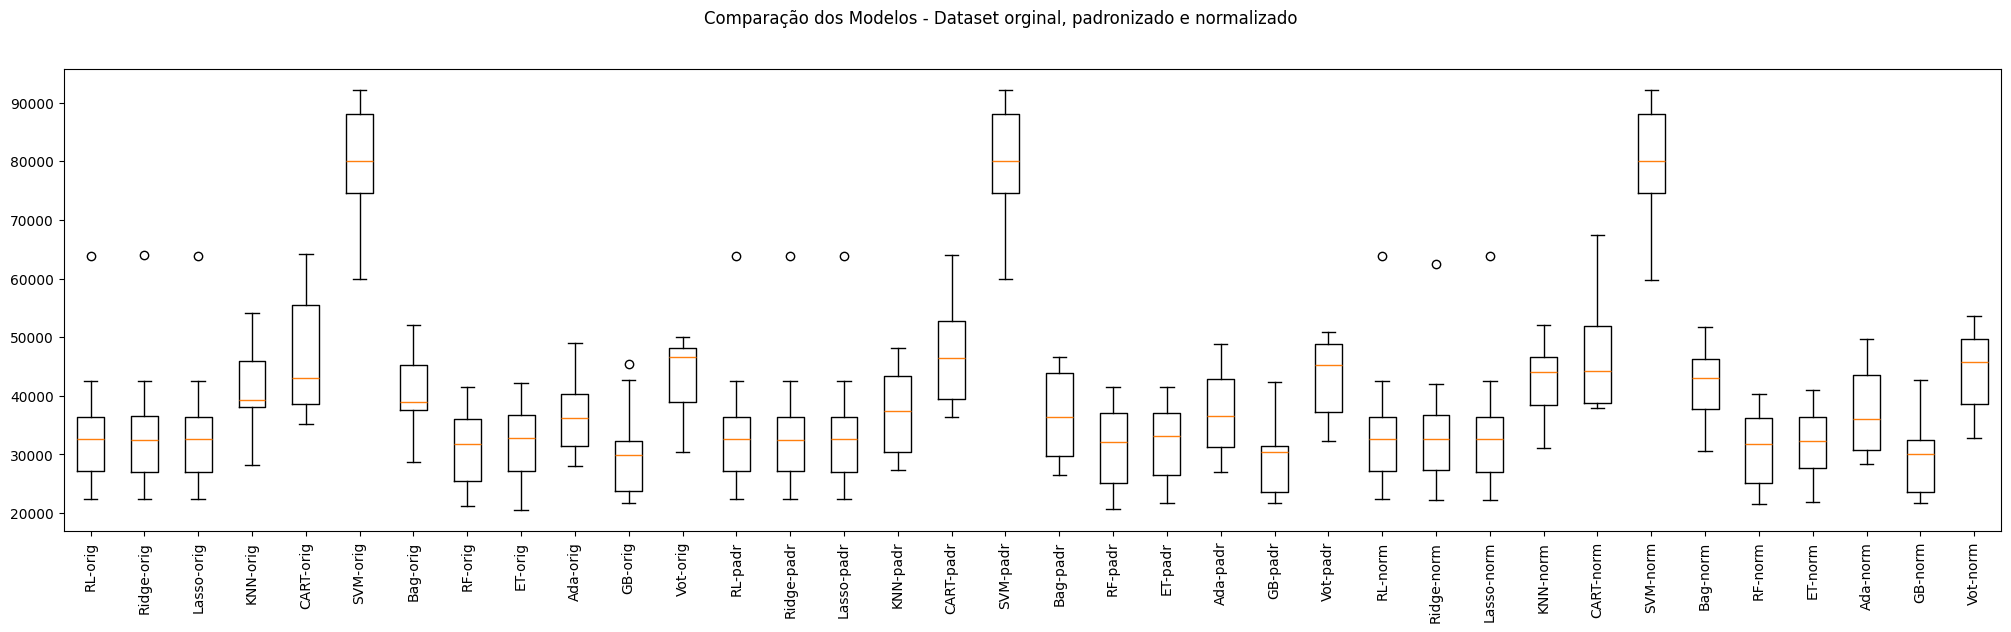

In [20]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = KNeighborsRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = KNeighborsRegressor()
bases.append(('KNN', model1))
model2 = SVR()
bases.append(('svr', model2))
model3 = Ridge()
bases.append(('ridge', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_lin = ('LR', LinearRegression())
ridge_reg = ('Ridge', Ridge())
lasso_reg = ('Lasso', Lasso())
KNN = ('KNN', KNeighborsRegressor())
CART = ('CART', DecisionTreeRegressor())
SVM = ('SVM', SVR())
bagging = ('Bagging', BaggingRegressor(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=num_trees))
voting = ('Voting', VotingRegressor(bases))

# Transformações que serão utilizadas

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('RL-orig', Pipeline([reg_lin])))
pipelines.append(('Ridge-orig', Pipeline([ridge_reg])))
pipelines.append(('Lasso-orig', Pipeline([lasso_reg])))
pipelines.append(('KNN-orig', Pipeline([KNN])))
pipelines.append(('CART-orig', Pipeline([CART])))
pipelines.append(('SVM-orig', Pipeline([SVM])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('RL-padr', Pipeline([standard_scaler, reg_lin])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge_reg])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso_reg])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, KNN])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, CART])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, SVM])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('RL-norm', Pipeline([min_max_scaler, reg_lin])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge_reg])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso_reg])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, KNN])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, CART])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, SVM])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_FS, y_train_FS, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(abs(cv_results)))
    names.append(name)
    msg = "%s: MSE %0.5f (%0.5f) - RMSE %0.5f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    nova_linha = {'Modelo': name, 'RMSE': np.sqrt(abs(cv_results.mean()))}
    nova_linha_df = pd.DataFrame([nova_linha])
    final_results = pd.concat([final_results, nova_linha_df], ignore_index=True)
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [21]:
final_results.sort_values(by = 'RMSE', ascending = True).head(20)

,Modelo,RMSE
22,GB-padr,30820.251122
34,GB-norm,30953.457209
31,RF-norm,31444.233835
10,GB-orig,31499.533480
7,RF-orig,31796.755290
19,RF-padr,31863.932943
32,ET-norm,32110.008929
8,ET-orig,32350.497272
20,ET-padr,32623.224764
25,Ridge-norm,36053.287975


In [22]:
# Criando uma lista para guardar os resultados
final_results_otimization = pd.DataFrame(columns = ['Modelo', 'RMSE', 'Parametros'])

In [25]:
# Tuning do gradient boosting

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('gradient_boosting', GradientBoostingRegressor())

standard_scaler = ('StandardScaler', StandardScaler())
# min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
# pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

param_grid_gb = {
    'gradient_boosting__n_estimators': [500, 600],
    'gradient_boosting__learning_rate': [0.1, 0.2],
    'gradient_boosting__subsample' : [0.7, 0.8],
    'gradient_boosting__max_depth' :[3, 1]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid_gb, cv=kfold, scoring='neg_mean_squared_error' )
    grid.fit(X_train_FS, y_train_FS)
    nova_linha = {'Modelo': name, 'RMSE': np.sqrt(abs(grid.best_score_)), 'Parametros': grid.best_params_}
    nova_linha_df = pd.DataFrame([nova_linha])
    final_results_otimization = pd.concat([final_results_otimization, nova_linha_df], ignore_index=True)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, np.sqrt(abs(grid.best_score_)), grid.best_params_))

# GB-orig - Melhor: 30770.091245 usando {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 500, 'gradient_boosting__subsample': 0.7}
# GB-orig - Melhor: 29765.924912 usando {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 1, 'gradient_boosting__n_estimators': 500, 'gradient_boosting__subsample': 0.7}

GB-orig - Melhor: 29765.924912 usando {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 1, 'gradient_boosting__n_estimators': 500, 'gradient_boosting__subsample': 0.7}
GB-padr - Melhor: 30571.567340 usando {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 1, 'gradient_boosting__n_estimators': 600, 'gradient_boosting__subsample': 0.8}


## 4 Finalização do Modelo

In [26]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
norm = MinMaxScaler().fit(X_train_FS) # ajuste do scaler com o conjunto de treino
rescaledX = norm.transform(X_train_FS) # aplicação da padronização no conjunto de treino
model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1,
                                  subsample = 0.7, max_depth = 1)
model.fit(rescaledX, y_train_FS)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = norm.transform(X_test_FS) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
mse = mean_squared_error(y_test_FS, predictions)
r2 = r2_score(y_test_FS, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 707565437.9826045
Root Mean Squared Error: 26600.10221752173
R2 Score: 0.898043857027018


In [27]:
resultados = pd.DataFrame({'Real': y_test_FS, 'Previsto': predictions})
resultados.head(10)

,Real,Previsto
0,151400.0,240272.839182
1,241500.0,198602.701873
2,82000.0,86553.054785
3,162000.0,166594.650246
4,140000.0,143725.865550
5,227000.0,224272.599867
6,228950.0,234287.257233
7,208300.0,182937.385460
8,128500.0,123683.920990
9,165000.0,191033.252945


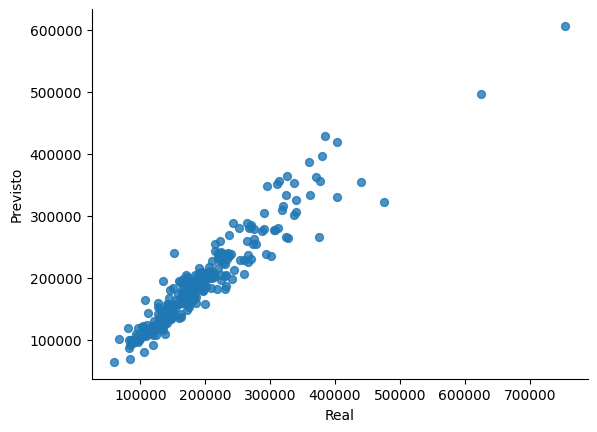

In [28]:
# @title Real vs Previsto

from matplotlib import pyplot as plt
resultados.plot(kind='scatter', x='Real', y='Previsto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)